In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
file = np.load(r"C:\Users\Manthan\Desktop\jupyter_extension_prettier\vs_code_extension\Image_Classification\mnist_compressed.npz")
print(list(file.keys()))

['train_images', 'train_labels', 'test_images', 'test_labels']


In [7]:
X_test, y_test, X_train, y_train =  file['test_images'], file['test_labels'], file['train_images'], file['train_labels']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(len(np.unique(y_train)))

(60000, 28, 56)
(60000,)
(10000, 28, 56)
(10000,)
100


In [10]:
# create cnn
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,56,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(100,activation="softmax")
])

model.compile(optimizer="adam",
             loss=SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

model.summary()

C:\Users\Manthan\.conda\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 54, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 12, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 10, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,564 (1.15 MB)

 Trainable params: 302,564 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
X_train[:10000]
y_train[:10000]
X_test[:1000]
y_test[:1000]

# normalising image
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10


C:\Users\Manthan\.conda\envs\tf\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.6034 - loss: 1.6136 - val_accuracy: 0.9480 - val_loss: 0.1763
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 47ms/step - accuracy: 0.9563 - loss: 0.1421 - val_accuracy: 0.9518 - val_loss: 0.1668
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9721 - loss: 0.0874 - val_accuracy: 0.9632 - val_loss: 0.1272
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9817 - loss: 0.0584 - val_accuracy: 0.9606 - val_loss: 0.1582
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9725 - val_loss: 0.1137
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9722 - val_loss: 0.1151
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 46ms/step - accuracy: 0.9907 - loss: 0.0282 - val_accuracy: 0.9671 - val_loss: 0.1444
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9920 - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


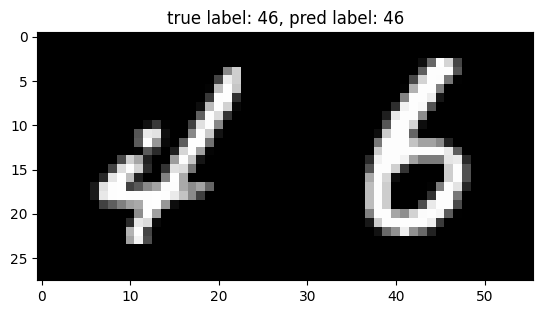

In [16]:
def visualise_results(index):
    test_img = X_test[index].reshape(28,56,1)
    true = y_test[index]

    pred_label = np.argmax(model.predict(X_test[index:index+1]))
    plt.title(f"true label: {true}, pred label: {pred_label}")
    plt.imshow(test_img, cmap="gray")
    plt.plot()

visualise_results(14)